In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


{'539103': 0, '530002': 1, '557002': 2, '531004': 3, '055004': 4, '554003': 5, '536102': 6, '540101': 7, '562102': 8, '560110': 9, '519012': 10, '543012': 11, '557000': 12, '052013': 13, '521003': 14, '520001': 15, '545012': 16, '561002': 17, '534110': 18, '550113': 19, '536103': 20, '546003': 21, '529002': 22, '542003': 23, '549000': 24, '531013': 25, '554010': 26, '054003': 27, '533002': 28, '524004': 29, '529011': 30, '551103': 31, '053014': 32, '052014': 33, '552013': 34, '052011': 35, '552011': 36, '559002': 37, '533001': 38, '560102': 39, '542002': 40, '562113': 41, '528102': 42, '522010': 43, '557013': 44, '538003': 45, '535012': 46, '051004': 47, '522011': 48, '556114': 49, '545001': 50, '536114': 51, '537001': 52, '556112': 53, '536101': 54, '539102': 55, '053012': 56, '562104': 57, '522000': 58, '553001': 59, '531001': 60, '563014': 61, '539111': 62, '540112': 63, '555013': 64, '527002': 65, '550110': 66, '539112': 67, '053011': 68, '519011': 69, '549011': 70, '521014': 71, '

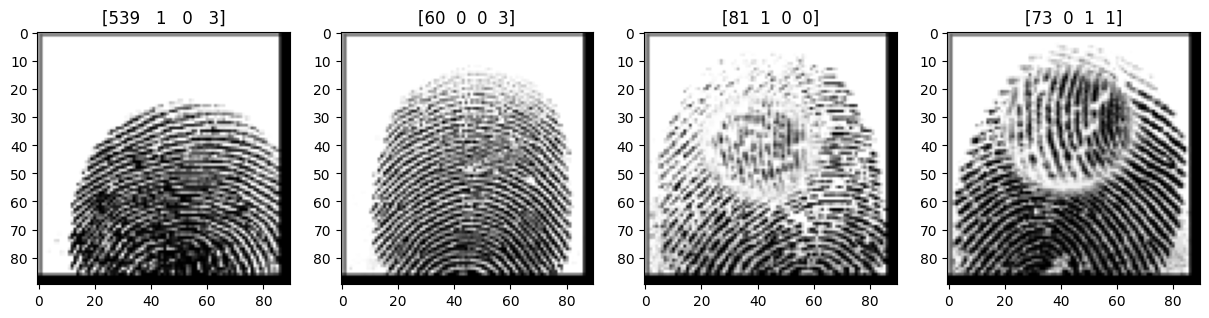

In [ ]:
from PIL import Image
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
#matplotlib 패키지 한글 폰트 설정 시작
plt.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
# plt.rc('font', family='AppleGothic') #맥
#matplotlib 패키지 한글 폰트 설정 끝
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
from sklearn.utils import shuffle
import random

REAL_MODE = 0
ALTERED_MODE = 1
def load_finger_print_data(data_dir, width=90, height=90, mode=REAL_MODE):
    x_data = []
    y_data = []
    file_names = os.listdir(data_dir)
    file_names = [file_name for file_name in file_names if not file_name.startswith ('.')] #.DS_Store 제외
    #file_names = file_names[:100] #데이터를 100개로 제한
    for file_name in file_names:
        file_path = '{}/{}'.format(data_dir, file_name)
        image = Image.open(file_path)
        image = image.convert('L') #'L': greyscale, '1': 이진화, 'RGB' , 'RGBA', 'CMYK'
        image = image.resize((width, height))
        numpy_image = np.array(image) #이미지 타입을 넘파이 타입으로 변환
        numpy_image = numpy_image.reshape((width, height, 1))
        x_data.append(numpy_image)
        subject_id, etc = file_name.split('__')
        if mode == REAL_MODE:
            gender, lr, finger, _ = etc.split('_')
        else:
            gender, lr, finger, _, _ = etc.split('_')
        if gender == 'M':
            gender = 0  
        else:
            gender = 1
        if lr =='Left':
            lr = 0  
        else:
            lr = 1
        if finger == 'thumb':
            finger = 0
        elif finger == 'index':
            finger = 1
        elif finger == 'middle':
            finger = 2
        elif finger == 'ring':
            finger = 3
        elif finger == 'little':
            finger = 4
        y_data.append(np.array([subject_id, gender, lr, finger], dtype=np.int32))
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    return x_data, y_data

##########데이터 로드

x_real, y_real = load_finger_print_data('/content/drive/MyDrive/SOCOFing/Real')
x_easy, y_easy = load_finger_print_data('/content/drive/MyDrive/SOCOFing/Altered-Easy', mode=ALTERED_MODE)
x_medium, y_medium = load_finger_print_data('/content/drive/MyDrive/SOCOFing/Altered-Medium', mode=ALTERED_MODE)
x_hard, y_hard = load_finger_print_data('/content/drive/MyDrive/SOCOFing/Altered-Hard', mode=ALTERED_MODE)

labels = ['다름', '같음']

##########데이터 분석

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)
plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)
plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)
plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')

##########데이터 전처리

x_augmenation = []
x_augmenation.extend(x_easy)
x_augmenation.extend(x_medium)
x_augmenation.extend(x_hard)
y_augmenation = []
y_augmenation.extend(y_easy)
y_augmenation.extend(y_medium)
y_augmenation.extend(y_hard)

x_augmenation_train, x_augmenation_test, y_augmenation_train, y_augmenation_test = train_test_split(x_augmenation, y_augmenation, test_size=0.1)

y_real_key_to_index = {} #y_real 키 인덱스 사전
for i, y in enumerate(y_real):
    key = y.astype(str)
    key = ''.join(key).zfill(6)
    y_real_key_to_index[key] = i
print(y_real_key_to_index) #{'009001': 0, '009004': 1, '009002': 2, '009003': 3, '009000': 4, '009011': 5, '009014': 6, '009012': 7, '009013': 8, '009010': 9}

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x_augmenation, y_augmenation, x_real, y_real_key_to_index, batch_size=32, shuffle=True):
        self.x_augmenation = x_augmenation
        self.y_augmenation = y_augmenation
        self.x_real = x_real
        self.y_real_key_to_index = y_real_key_to_index
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        total_batch = len(self.x_augmenation) // self.batch_size
        if len(self.x_augmenation) % self.batch_size != 0:
            total_batch += 1

        return total_batch

    def __getitem__(self, index):
        total_batch = len(self.x_augmenation) // self.batch_size
        if len(self.x_augmenation) % self.batch_size != 0:
            total_batch += 1        
        start = index * self.batch_size
        end = start + self.batch_size
        x_data_batch = self.x_augmenation[start:end]
        y_data_batch = self.y_augmenation[start:end]

        x1_batch = np.zeros((len(x_data_batch), 90, 90, 1))
        x2_batch = np.zeros((len(x_data_batch), 90, 90, 1))
        y_batch = np.zeros((len(x_data_batch), 1))   

        for i, y in enumerate(y_data_batch):
            #print(y) #[9 0 1 2]
            y_real_key = y.astype(str)
            #print(y_real_key) #['9' '0' '1' '2']
            y_real_key = ''.join(y_real_key).zfill(6)
            #print(y_real_key) #009012

            x1_batch[i] = x_data_batch[i]
            #같은 이미지
            if random.random() > 0.5:
                y_real_index = self.y_real_key_to_index[y_real_key]
                #print(y_real_index) #9
                x2_batch[i] = self.x_real[y_real_index] 
                y_batch[i] = 1
            #다른 이미지
            else:
                while True:
                    key, index = random.choice(list(self.y_real_key_to_index.items()))
                    if key != y_real_key:
                        break

                x2_batch[i] = self.x_real[index] 
                y_batch[i] = 0

        #print(x1_batch.shape) #(32, 90, 90, 1)
        #print(x2_batch.shape) #(32, 90, 90, 1)
        #print(y_batch.shape) #(32, 1)

        return [x1_batch / 255, x2_batch / 255.], y_batch

    def on_epoch_end(self):
        if self.shuffle == True:
            self.x_augmenation, self.y_augmenation = shuffle(self.x_augmenation, self.y_augmenation)

train_data_generator = DataGenerator(x_augmenation_train, y_augmenation_train, x_real, y_real_key_to_index, shuffle=True)
test_data_generator = DataGenerator(x_augmenation_test, y_augmenation_test, x_real, y_real_key_to_index, shuffle=False)

##########모델 생성

input = tf.keras.layers.Input(shape=(90, 90, 1))
# input레이어 : 90X90크기의 이미지가 입력됨
net = tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), strides=1, padding='same', activation='relu')(input)
# Conv2D 레이어 => 이미지 분류, 객체 검출, 세그멘테이션 드으이 컴퓨터 비전 작업에서 가장 많이 사용하는 레이어 중 하나
# => 입력 이미지와 커널이라는 작은 필터를 사용하여 이미지를 합성곱하여 입력 이미지에서 발견된 사각적 패턴을 나타내는 특징 맵 생성 
# input 레이어를 입력으로 받음 / filters=32개의 필터 / kernel_size=(2,2)를 적용하여 feature map을 생성 / 
# padding='same'으로 지정하여 입력과 출력의 크기가 동일하게함
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(net)\
# MaxPooling2D 레이어 => 컨볼루션 레이어(Conv2D)와 함계 사용되는 레이어 중 하나
# =>입력된 이미지를 일정한 크기의 작은 블록으로 나누어서 각 블록마다 가장 큰 값을 선택하고, 그 값들로 이루어진 작은 이미지를 생성하는 역할을 함
# =>이 작은 이미지는 컨볼루션 레이어에서 추출된 특징 맵(feature map)의 크기를 줄이는 역할을 하면서도 특징 맵에서 가장 중요한 정보만을 선택하여 추출할 수 있게함
# pool_size=(2,2)와 strides=2를 지정하여 feature map의 크기를 절반으로 줄입니다.
# padding='same'으로 지정하여 feature map의 크기가 절반으로 줄어들어도 입력과 출력의 크기가 동일하도록 합니다.
# ** 컨볼루션 레이어와 MaxPooling2D를 함께 사용하는 이유 :
# Conv2D 레이어를 통해 이미지의 특징을 추출하고 나면, 이어서 MaxPooling2D 레이어를 사용하여 feature map에서 불필요한 정보를 제거
# MaxPooling2D 레이어는 feature map을 작은 영역으로 나누고, 각 영역에서 가장 큰 값을 추출하여 새로운 작은 feature map을 생성
net = tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), strides=1, padding='same', activation='relu')(input)
# Conv2D 레이어: filters=64개의 필터와 kernel_size=(2,2)를 적용하여 feature map을 생성
# padding='same'으로 지정하여 입력과 출력의 크기가 동일하도록 함
# ** MaxPooling2D레이어 이후 컨볼루션 레이어가 다시 나온 이유 : 
# MaxPooling2D 레이어를 사용하면서 이미지의 정보를 압축하게 되므로, 필터 수가 큰 컨볼루션 레이어를 다시 추가하여 이미지의 특징을 더욱 정교하게 추출하는 것이 
# 이를 통해 최종적으로 모델이 더욱 정확하게 이미지를 분류할 수 있게 됨
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(net)
# MaxPooling2D 레이어: pool_size=(2,2)와 strides=2를 지정하여 feature map의 크기를 절반으로 줄임
# padding='same'으로 지정하여 feature map의 크기가 절반으로 줄어들어도 입력과 출력의 크기가 동일하도록 함
feature_model = tf.keras.models.Model(input, net)
# feature_model: input 레이어와 net을 입력으로 받아, feature extraction 부분을 구성하는 모델을 정의
# 이 모델은 입력 이미지를 feature map으로 변환하는 역할을 함

feature_model.summary()
'''
Model: "model_235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_355 (InputLayer)       [(None, 90, 90, 1)]       0         
_________________________________________________________________
conv2d_354 (Conv2D)          (None, 90, 90, 64)        320       
_________________________________________________________________
max_pooling2d_354 (MaxPoolin (None, 45, 45, 64)        0         
=================================================================
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
'''

x1_input = tf.keras.layers.Input(shape=(90, 90, 1)) #핸드폰 사용할 때 마다 입력하는 지문
x2_input = tf.keras.layers.Input(shape=(90, 90, 1)) #핸드폰 처음 샀을 때 등록한 지문
net = tf.keras.layers.Subtract()([feature_model(x1_input), feature_model(x2_input)]) #feature_model 은 두 입력에 대해 가중치 공유
net = tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), strides=1, padding='same', activation='relu')(net)
# Conv2D 레이어에서는 주로 이미지의 공간 정보를 추출하기 위해 filter를 이용하여 합성곱을 계산 / 이때 filter의 크기에 따라 출력되는 feature map의 크기가 결정
# Conv2D 레이어를 쌓을수록 출력되는 feature map의 크기가 커져 파라미터 수도 많아지게 됨
# 이를 방지하기 위해 MaxPooling2D 레이어를 사용하여 feature map을 다운샘플링하면서 크기를 줄임
# 이 과정에서 feature map의 강도가 가장 큰 값만 취하는 max pooling 연산을 사용
# 이러한 다운샘플링 과정을 통해 모델이 복잡한 패턴을 학습하는 것을 방지, 일반화 성능을 향상시키는 데 도움
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(net)
# MaxPooling2D레이어로 다운샘플링
# MaxPooling2D 레이어는 Conv2D 레이어와 같은 특징 추출 레이어를 거친 후 출력되는 feature map의 크기를 줄이는 데 사용
# 이를 통해 파라미터 수를 줄이고, 모델의 학습 속도를 높이면서도 모델의 복잡성을 낮출 수 있음

net = tf.keras.layers.Flatten()(net)
# Flatten레이어로 1차원으로 바꿔줌
net = tf.keras.layers.Dense(32, activation='relu')(net)
# 이전 레이어에서 추출한 특징들을 기반으로 예측 모델 구축
net = tf.keras.layers.Dense(1, activation='sigmoid')(net)
model = tf.keras.models.Model([x1_input, x2_input], net)

model.summary()

'''
Model: "model_236"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_356 (InputLayer)          [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
input_357 (InputLayer)          [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
model_235 (Model)               (None, 45, 45, 64)   320         input_356[0][0]                  
                                                                 input_357[0][0]                  
__________________________________________________________________________________________________
subtract_118 (Subtract)         (None, 45, 45, 64)   0           model_235[1][0]                  
                                                                 model_235[2][0]                  
__________________________________________________________________________________________________
conv2d_355 (Conv2D)             (None, 45, 45, 32)   8224        subtract_118[0][0]               
__________________________________________________________________________________________________
max_pooling2d_355 (MaxPooling2D (None, 23, 23, 32)   0           conv2d_355[0][0]                 
__________________________________________________________________________________________________
flatten_117 (Flatten)           (None, 16928)        0           max_pooling2d_355[0][0]          
__________________________________________________________________________________________________
dense_234 (Dense)               (None, 32)           541728      flatten_117[0][0]                
__________________________________________________________________________________________________
dense_235 (Dense)               (None, 1)            33          dense_234[0][0]                  
==================================================================================================
Total params: 550,305
Trainable params: 550,305
Non-trainable params: 0
__________________________________________________________________________________________________
'''

##########모델 학습

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# "loss" => 손실함수 지정, optimizer => 최적화 알고리즘 지정, "metrics" => 모델이 평가될 때 사용될 지표를 지정/이경우 정확도(accuracy)를 사용

model.fit(train_data_generator, epochs=15, validation_data=test_data_generator) 
# 모델학습 수행 코드
# model.fit() => 모델을 학습시키는 함수
# train_data_generator => 학습 데이터셋
# epochs => epoch 수
# validation_data => 검증데이터 셋



1/1 [==============================] - 0s 243ms/step
같음 1.0


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44057 (\N{HANGUL SYLLABLE GAT}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44057 (\N{HANGUL SYLLABLE GAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing f

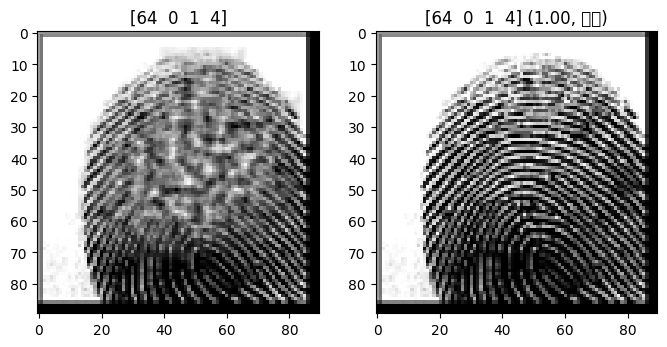

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


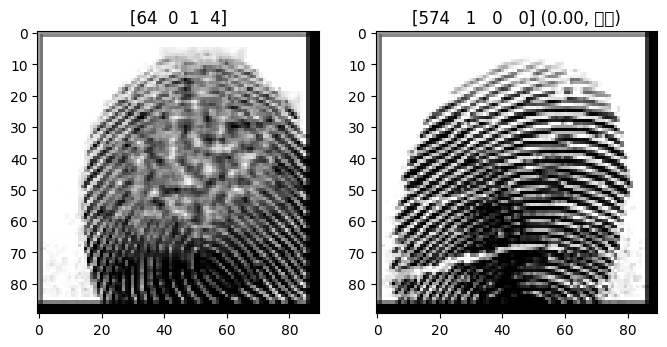

In [ ]:
##########모델 검증

##########모델 예측

# file_path = '/Users/mac/Downloads/SOCOFing/Altered/Altered-Hard/9__M_Left_thumb_finger_Zcut.BMP'
file_path = '/content/drive/MyDrive/SOCOFing/Altered-Hard/9__M_Left_thumb_finger_Zcut.BMP'


### <흑백 이미지 파일 읽어 오기> ###
image = Image.open(file_path)
# file_path에 위치한 이미지 오픈
# PIL(Python Imaging Library)에서 제공하는 이미지 객체 형태로 오픈
image = image.convert('L') #'L': greyscale, '1': 이진화, 'RGB' , 'RGBA', 'CMYK'
# 이미지를 그레이크케일(grayscale)로 변환하기 위해 'image.convert()'함수 사용
# 'L'인자는 그레이스케일 이미지로 변환하겠다는 의미
image = image.resize((90, 90))
# 이미지 크기를 (90,90)으로 조절
numpy_image = np.array(image) #이미지 타입을 넘파이 타입으로 변환
# np.array()함수를 사용하여 이미지 객체를 넘파이 배열로 변환
numpy_image = numpy_image.reshape((90, 90, 1)) 
# 변환된 넘파이 배열의 형태를 (90,90,1)로 변경
# 여기서 마지막 차원이 1인 이유는 이미지가 그레이스케일이기 때문
# 만약 이미지가 RGB색상을 가진 컬러 이미지였다면 형태를 (90,90,3)으로 변경해야 함
x1_test = np.expand_dims(numpy_image, axis=0)
# np.expand_dims()함수를 사용하여 이미지 배열의 차원을 확장
# axis = 0 인자를 전달하여 첫 번째 차원에 차원을 추가 => 이 작업은 모델에 이미지를 입력할 때, 데이터의 차원을 맞추기 위함
#특성 스케일링
x1_test = x1_test / 255
# 입력 이미지의 픽셀 값을 0~1사이의 값으로 정규화 하는 코드
# 이미지 데이터를 처리 할 때 0~1 사이의 실수값으로 정규화하면 모델의 학습이 더욱 잘 이루어지기 때문
# 이는 입력데이터 값의 범위를 조저하여 학습이 불안정해지는 것을 방지하고, 최적화 아록리즘이 더 잘 작동하도록 만들어줌

# file_path = '/Users/mac/Downloads/SOCOFing/Real/9__M_Left_thumb_finger.BMP'
file_path = '/content/drive/MyDrive/SOCOFing/Real/9__M_Left_thumb_finger.BMP'

### <흑백 이미지 파일 읽어 오기> ###
image = Image.open(file_path)
image = image.convert('L') #'L': greyscale, '1': 이진화, 'RGB' , 'RGBA', 'CMYK'
image = image.resize((90, 90))
numpy_image = np.array(image) #이미지 타입을 넘파이 타입으로 변환
numpy_image = numpy_image.reshape((90, 90, 1))
x2_test = np.expand_dims(numpy_image, axis=0)
#특성 스케일링
x2_test = x2_test / 255

y_predict = model.predict([x1_test, x2_test])
# x1_test, x2_test에 대한 예측값을 계산
# model.predict() 함수가 반환하는 값은 0,1 사이의 하나의 실수값
# 이 값은 입력 데이터가 양성 클래스에 속할 확률을 나타냄
# 이 값이 0.5보다 크면 모들은 입력 데이터를 양성 클래스로 분류, 그렇지 않으면 음성 클래스로 분류
# 따라서 예측값은 0과 1사이의 하나의 실수값으로 나타남
#  ** 양성클래스 : 우리가 찾고하 하는 클래스 // 음성 클래스 : 우리가 찾고자 하는 클래스가 아닌 클래스

label = labels[1 if y_predict[0][0] > 0.5 else 0]
# y_predict[0][0]값이 0.5보다 크면 'labels'리스트의 두번째 항목(양성 클래스)를. 0.5보다 작거나 같으면 첫 번째(음성 클래스)을 'label'변수에 저장
confidence = y_predict[0][0] if y_predict[0][0] > 0.5 else 1 - y_predict[0][0]
#  y_predict[0][0] 값이 0.5보다 크면 y_predict[0][0] 값을, 작으면 1에서 y_predict[0][0] 값을 뺀 값을 confidence 변수에 저장
# 모델이 예측한 값이 얼마나 강하게(혹은 확신도가 높게) 예측했는지를 나타내는 지표
# 모델이 예측한 값이 0.5보다 크다면 해당 샘플을 양성클래스로 예측한 정도가 높다는 의미 => 'y_predict[0][0]'값을 그대로 사용 
# 반면 0.5보다 작다면 해당 샘플을 음성 클래스로 예측한 정도가 높다는 의미, 1에서 'y_predict[0][0]'값을 뺀 값을 사용
# 이렇게 계산된 'confidence'값이 높을수록 모델의 예측 결과에 대한 확신도가 높다는 것을 나타냄
print(label, confidence) 


# 참고)

##########모델 예측

random_index = random.randint(0, len(x_augmenation_test) - 1)
#print(random_index) #7
x1_test = x_augmenation_test[random_index]
x1_test = x1_test.reshape((1, 90, 90, 1))
x1_test = x1_test / 255

#print(y_augmenation_test[random_index]) #[9 0 1 2]
y_real_key = y_augmenation_test[random_index].astype(str)
#print(y_real_key) #['9' '0' '1' '2']
y_real_key = ''.join(y_real_key).zfill(6)
#print(y_real_key) #009010
y_real_index = y_real_key_to_index[y_real_key]
#print(y_real_index) #9
x2_test = x_real[y_real_index]
x2_test = x2_test.reshape((1, 90, 90, 1))
x2_test = x2_test / 255

y_predict = model([x1_test, x2_test]).numpy()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('{}'.format(y_augmenation_test[random_index]))
plt.imshow(x1_test.squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('{} ({:.2f}, {})'.format(y_real[y_real_index], y_predict[0][0], labels[1 if y_predict[0][0] > 0.5 else 0]))
plt.imshow(x2_test.squeeze(), cmap='gray')

#

while True:
    key, index = random.choice(list(y_real_key_to_index.items()))
    if key != y_real_key:
        break
x2_test = x_real[index] 
x2_test = x2_test.reshape((1, 90, 90, 1))
x2_test = x2_test / 255

y_predict = model([x1_test, x2_test]).numpy()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('{}'.format(y_augmenation_test[random_index]))
plt.imshow(x1_test.squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('{} ({:.2f}, {})'.format(y_real[index], y_predict[0][0], labels[1 if y_predict[0][0] > 0.5 else 0]))
plt.imshow(x2_test.squeeze(), cmap='gray')